# ANALISIS DE LA CALIDAD DEL VINO

El objetivo de esta kata es guiarnos a través de los principales pasos que componen un proyecto de Machine Learning.

Existen ocho pasos principales:

1. Encuadrar el problema y tener la visión global.

2. Obtener los datos.

3. Explorar los datos para obtener ideas.

4. Preparar los datos para exponer lo mejor posible los patrones de datos subyacentes a los algoritmos de Machine Learning.

5. Explorar muchos modelos diferentes y preseleccionar los mejores.

6. Afinar nuestros modelos y combinarlos en una gran solución.

7. Presentar nuestra solución.

8. Implantar, monitorizar y mantener nuestro sistema.


# Encuadrar el problema y tener la visión global

Disponemos un conjunto de datos que contiene diversas características de variantes de tinto y blanco del vino portugués "Vinho Verde". Disponemos de variables químicas, como son la cantidad de alcohol, ácido cítrico, acidez, densidad, pH, etc; así como de una variable sensorial y subjetiva como es la puntuación con la que un grupo de expertos calificaron la calidad del vino: entre 0 (muy malo) y 10 (muy excelente).

El proyecto que nos encargan es que desarrollemos un modelo que pueda predecir la puntuación de calidad dados dichos indicadores bioquímicos.

¿Cómo se enmarcaría este problema (supervisado, no supervisado, etc.)?

¿Cuál es la variable objetivo? ¿Cuáles son los predictores?

¿Cómo vamos a medir el rendimiento de nuestro modelo?

Verificar las asunciones: por ejemplo, para qué se va a utilizar nuestra predicción de puntuación de calidad, ¿se va a utilizar para que otro sistema posterior los catalogue como "malo", "medio", "bueno" o "excelente"? ¿Qué implicaciones tendría?

# Obtener los datos

En este apartado tendríamos que lidiar con el origen de los datos. ¿Se encuentran en una bbdd? ¿Cuál es el formato? ¿Disponemos de las credenciales de acceso? ¿Disponemos de espacio para su manipulación? ¿Se trata de datos sensibles?

Importa las librerías necesarias:

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Lee los datos y crea un DataFrame

In [16]:
data = pd.read_csv('../Data/winequality.csv',sep=';')
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
6492     10.5        5  
6493     11.2        6  
6494     11.0        6  
6495     10.2        5  
6496     11.0        6  

[6497 rows x 12 columns]

In [17]:
pd.get_dummies(data)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
6492     10.5        5  
6493     11.2        6  
6494     11.0        6  
6495     10.2        5  
6496     11.0        6  

[6497 rows x 12 columns]

# Explorar los datos

En este aparatado comprobaremos el tamaños de los datos, su naturaleza (si son series temporales, datos geográficos, etc.), su tipo (numéricos, categóricos, fechas, texto, objetos, float, etc.) y si existen valores ausentes. Si se trata de aprendizaje supervisado identificaremos cuál/cuáles son los atributos objetivo. Visualizaremos los datos y comprobaremos si existen correlaciones entre ellos y de qué tipo. También identificaremos posibles transformaciones que debamos realizar sobre ellos. Incluso podríamos identificar la necesidad de crear nuevos datos a partir de los existentes.

¿Cuál es el tamaño de los datasets?

In [18]:
data.size()

TypeError: 'numpy.int32' object is not callable

Muestra las primeras instancias del dataset:

In [19]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

Muestra información básica sobre los campos del dataset:

In [20]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

Muestra si existen valores nulos en el dataset y cuántos por cada campo:

In [21]:
# No hay nan en este dataset
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

¿Cómo se distribuyen las variables? Realiza un gráfico compuesto que muestre un histograma por cada variable

In [22]:
data.plot.hist(bins=10)

Comprobemos cómo se distribuye nuestra variable objetivo, la puntución de calidad:

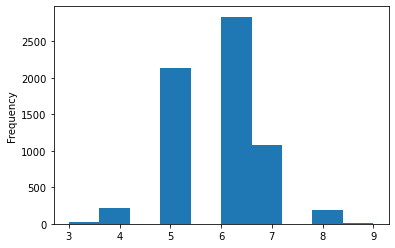

In [23]:
data['quality'].plot.hist(bins=10)

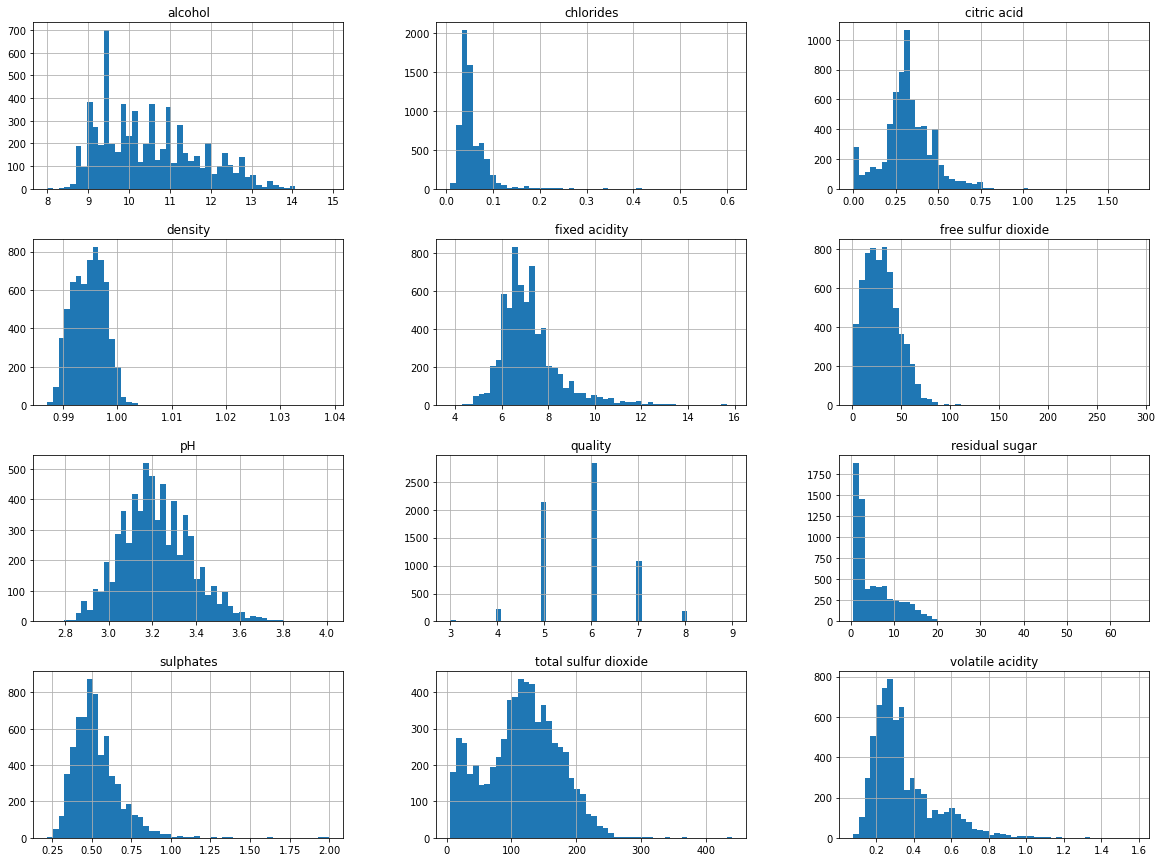

In [44]:
data.hist(bins=50, figsize=(20,15));

In [48]:
print(f"Porcentaje de cada una de las puntuaciones de calidad")
data["quality"].value_counts(normalize=True)*100

Porcentaje de cada una de las puntuaciones de calidad


6    43.650916
5    32.907496
7    16.607665
4     3.324611
8     2.970602
3     0.461752
9     0.076959
Name: quality, dtype: float64

Comprueba las correlaciones entre los atributos del dataset

In [24]:
data.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   

                       alcohol   quality  
fixed acidity        -0.095452 -0.076743  
volatile acidity     -0.037640 -0.265699  
citric acid          -0.010493  0.085532  
residual sugar       -0.359415 -0.036980  
chlorides            -0.256916 -0.200666  
free sulfur dioxide  -0.179838  0.055463  
total sulfur dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.121248  0.019506  
sulphates            -0.003029  0.038485  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

In [65]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

#Si existe mucha correlacion entre alguno de los predictores, puede llevar a error en las predicciones (problema de la colinealidad)

In [74]:
data.corr()[['quality']].sort_values(by='quality').style.background_gradient(cmap='coolwarm').set_precision(3)

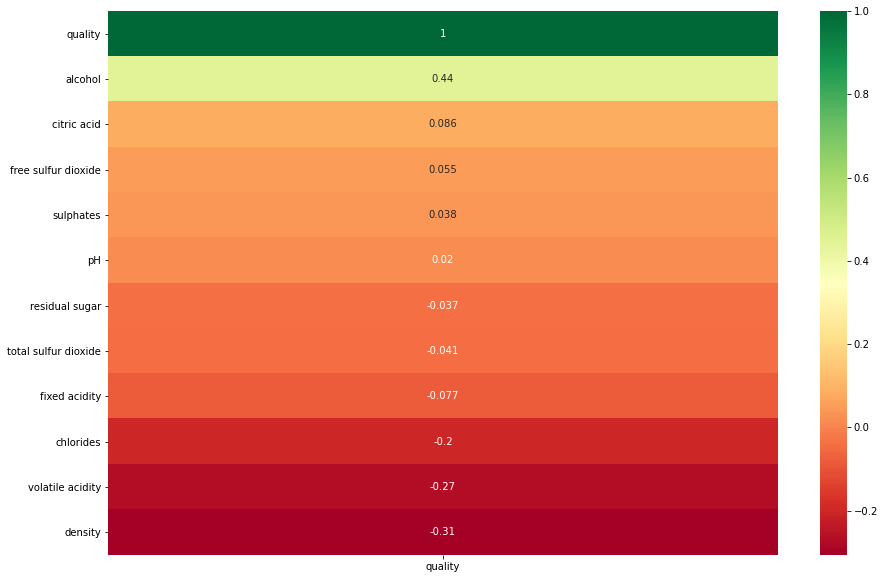

In [81]:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(data.corr()[['quality']].sort_values(by='quality',ascending=False), annot=True, cmap='RdYlGn')
plt.show()

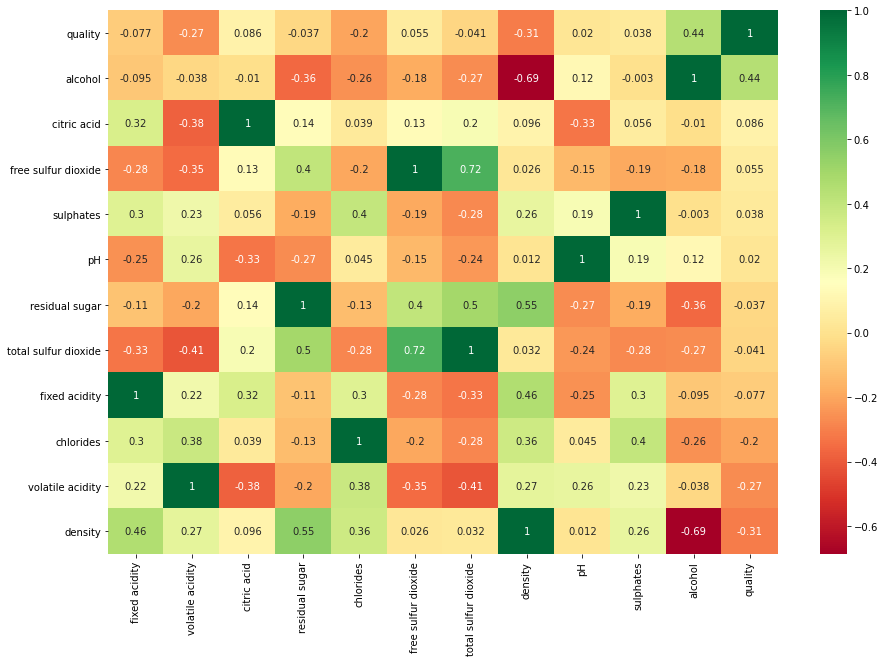

In [7]:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(data.corr().sort_values(by='quality',ascending=False), annot=True, cmap='RdYlGn')
plt.show()

Muestra solo las correlaciones de la variable objetivo con el resto de atributos

In [69]:
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

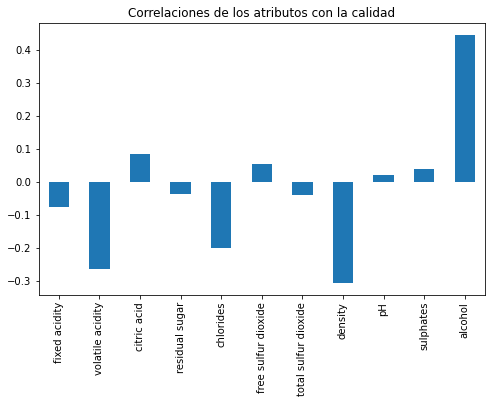

In [88]:
corr_matrix = data.corr()
plt.figure(figsize=(8,5))
corr_matrix["quality"].drop("quality").plot(kind='bar')
plt.title("Correlaciones de los atributos con la calidad")
plt.show()

Representa gráficamente dichas correlaciones

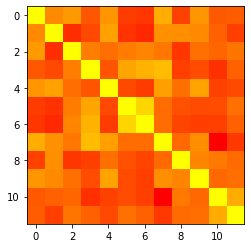

In [26]:
plt.imshow(data.corr(), cmap='autumn')

# Preparar los datos

En este apartado llevaríamos a cabo la ingeniería de características o *feature engineering*: realizar las transformaciones necesarias en los datos (escalado, transformaciones de valores categóricos, etc.). Crearíamos nuevas features si fuera necesario. También trataríamos el problemas de los valores nulos. Procederíamos a la limpieza del dataset, eliminando aquellos atributos que no proporcionen información útil.

# Seleccionar y entrenar modelos

El objetivo de esta fase es entrenar muchos modelos rápidamente y sin refinar, de diferentes categorías (es decir, lineales, SVM, Random Forests, redes neuronales, etc.) usando los parámetros estándares. La idea es tener un visión rápida de qué modelos son más prometedores. Medir y comparar la ejecución de todos ellos. Selecciona los mejores modelos.

Crea el dataset de predictores y el dataset con la variable objetivo

In [ ]:
# axis 0 -> Quitar fila
# Quita los nan de todas las columnas
# data = data.drop(['Cabin'], axis=1)

# axis 1 -> Quitar columna
# data = data.drop(['Cabin'], axis=1)


In [52]:
# Modelo 1 - Seleccionamos la 3 variables mas correladas en valor absoluto con nuestra variable objetivo

abs(data.corr()['quality']).sort_values(ascending=False)

# alcohol, density, volatile acidity, chlorides

# X1 = data[['alcohol','density','volatile acidity']]
# y1 = data['quality']


quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
chlorides               0.200666
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64

In [53]:
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

Crea los datasets necesarios para dispones de datos de entrenamiento y prueba

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1,test_size=0.1)

Selecciona y crea el modelo que vas a entrenar, en este caso un modelo de regresión lineal

In [32]:
from sklearn.ensemble import RandomForestRegressor

Entrena el modelo con los datos de entrenamiento

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)

(*Opcional*) Dado que estamos entrenando un modelo de regresión lineal, ¿cuáles son los coeficientes estimados de la ecuación de regresión resultantes después del entrenamiento?

In [ ]:
#Coeficientes del modelo

clf.coef_

(*Opcional*) ¿Cuál sería el término independiente estimado de la ecuación de regresión resultante después del entrenamiento?

In [ ]:
# Error de la recta de regresion
clf.intercept_

Una vez entrenado el modelo, realiza predicciones con los datos de prueba

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 

y_pred = rf.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

print(f'Mean {y_train.mean()}')
print(f'Std: {y_train.std()}')

plt.scatter(y_test, y_pred,
            s=10*np.sqrt(np.power(y_pred - y_test, 2)))
# plt.plot([0, 10], [0, 10], c='red')

0.5670857119167504
0.6148295873016663
Mean 5.819394561313494
Std: 0.8749449576302113


In [35]:
for i in range(2, 200, 10):
    print(f'n_est {i}')
    rf = RandomForestRegressor(n_estimators=i).fit(X_train, y_train)
    # ERROR EN EL CONJUNTO DE TRAIN
    y_pred_train = rf.predict(X_train)

    #print(mean_squared_error(y_train, y_pred_train))
    print('train error', mean_absolute_error(y_train, y_pred_train))

    # ERROR EN EL CONJUNTO DE TEST
    y_pred = rf.predict(X_test)

    #print(mean_squared_error(y_test, y_pred))
    print('test error', mean_absolute_error(y_test, y_pred))
    
    print('-----------')

n_est 2
train error 0.6121376268406724
test error 0.6131777522654258
-----------
n_est 12
train error 0.6116927565673058
test error 0.6147242118450009
-----------
n_est 22
train error 0.6108503809999414
test error 0.6158525938226608
-----------
n_est 32
train error 0.6106466765590751
test error 0.6140962161690838
-----------
n_est 42
train error 0.610990909519398
test error 0.6143090250889925
-----------
n_est 52
train error 0.610730525032026
test error 0.6140277580109728
-----------
n_est 62
train error 0.6105697014621756
test error 0.6127086133537517
-----------
n_est 72
train error 0.6112225456791863
test error 0.6146927875806854
-----------
n_est 82
train error 0.6111483942515461
test error 0.6143085746931493
-----------
n_est 92
train error 0.6113558783860041
test error 0.6147495427628179
-----------
n_est 102
train error 0.6112722949646526
test error 0.6151460687341979
-----------
n_est 112
train error 0.6108110582949263
test error 0.6142689014251612
-----------
n_est 122
train e

¿Qué rendimiento tiene el modelo con las métricas que has elegido?

In [50]:
# Repetir todos los pasos
data = pd.read_csv('../Data/winequality.csv',sep=';')

print(data.keys())


# print('-----------')
# print('Correlacion')
# print('-----------')

# data.corr()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

# Train model

X1,y1 = data[['alcohol']],data['quality']

x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

curve = {'i': [],
         'score': []}
for i in range(1, 30):
    clf = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    s = clf.score(x_test, y_test)
    print(f'N_neighbors = {i}: {s}')
    
    curve['i'].append(i)
    curve['score'].append(s)
    
plt.plot(curve['i'], curve['score'])    

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
N_neighbors = 1: 0.4123076923076923
N_neighbors = 2: 0.42
N_neighbors = 3: 0.4307692307692308
N_neighbors = 4: 0.4546153846153846
N_neighbors = 5: 0.4776923076923077
N_neighbors = 6: 0.48923076923076925
N_neighbors = 7: 0.4876923076923077
N_neighbors = 8: 0.4869230769230769
N_neighbors = 9: 0.48923076923076925
N_neighbors = 10: 0.4969230769230769
N_neighbors = 11: 0.5023076923076923
N_neighbors = 12: 0.49615384615384617
N_neighbors = 13: 0.4930769230769231
N_neighbors = 14: 0.5115384615384615
N_neighbors = 15: 0.5015384615384615
N_neighbors = 16: 0.5053846153846154
N_neighbors = 17: 0.5092307692307693
N_neighbors = 18: 0.5107692307692308
N_neighbors = 19: 0.5115384615384615
N_neighbors = 20: 0.5138461538461538
N_neighbors = 21: 0.5
N_neighbors = 22: 0.503076923076

In [129]:
# Repetir todos los pasos
data = pd.read_csv('../Data/winequality.csv',sep=';')

# print(data.keys())


# print('-----------')
# print('Correlacion')
# print('-----------')

# data.corr()

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

# Train model

# X1 = data[['alcohol']]
X1 = data.drop("quality",axis=1)
y1 = data['quality']

# scaler = MinMaxScaler(feature_range=(4, 9))
# scaler.fit(y1)
# y1 = scaler.transform(y1)

#print(y1[1,:])


x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1)

#Se añade el parametro dual=False para evitar el error: warnings.warn( liblinear failed to converge increase
# clf = LinearSVC(random_state=0,dual=False).fit(x_train, y_train)
clf = LinearRegression().fit(x_train, y_train)



## LogisticRegression
# clf = LogisticRegression()
# clf.fit(X1, y1)

y_pred = clf.predict(x_test)


# datos con los que se evalúan
print('Prediccion: ', clf.predict(x_test)) # El método predict me devuelve una CLASE
print('Real:       ', np.array(y_test))
print(clf.score(x_test, y_test))

from sklearn.metrics import recall_score, precision_score, f1_score, r2_score

# Obtener probabilidad de error
# y_pred_proba = clf.predict_proba(x_test)

# # Suma de todas las veces que ha acertado
# print(y_pred_proba.sum()/y_pred_proba.size)

# # Numero total de prediciones
# print(y_pred_proba.size)

# print('predict_proba')
# print(y_pred_proba)

# # print('RECALL SCORE:')
# # recall_score(y_test, y_pred>0.5)



Prediccion:  [5.96752428 5.95153062 5.73937704 6.03709851 5.57813476 6.0831045
 5.68680422 6.30671777 5.66129083 4.659124   6.07571034 6.29023282
 5.60590677 6.3917241  6.16143706 4.7370827  5.29717886 6.03883277
 5.80861391 6.5617839  5.6559385  6.65662678 5.58128266 5.957369
 5.90588044 5.42726078 5.78309336 5.77618161 6.08471123 5.34120241
 5.86491697 6.11554984 6.03723477 5.93997297 6.1987385  5.78898201
 6.18426412 5.2896706  5.66209892 6.19852971 5.99233324 6.06376215
 6.48308514 6.62505755 4.67656395 4.96020147 5.95470983 5.64804526
 6.38432024 5.31915287 4.0423692  5.57334759 5.25204636 5.41149609
 6.18199694 6.3877547  5.44694901 5.95649818 6.26026145 5.47795466
 5.74551705 5.84587714 5.65709652 5.97419069 5.33502404 5.57907128
 6.81606942 6.19250977 5.36711683 6.03646424 6.05195324 6.41735402
 5.48569358 5.61432407 5.47928259 6.10122284 5.97870625 6.31570559
 5.26073295 5.71938689 6.34975836 6.06533683 5.91286311 6.5039102
 5.28611889 6.18800692 6.35617297 5.61852546 5.737097

In [130]:
#Coeficientes del modelo

clf.coef_

array([ 6.18588862e-02, -1.36114933e+00, -9.56327859e-02,  4.21087495e-02,
       -5.53210141e-01,  6.16574772e-03, -2.46510854e-03, -5.06871572e+01,
        4.51831003e-01,  7.90590039e-01,  2.73387816e-01])

In [131]:
# Error de la recta de regresion
clf.intercept_

51.43722430253953

In [132]:
pd.DataFrame(clf.coef_, x_test.columns, columns=["Coeficientes"])

Coeficientes
fixed acidity             0.061859
volatile acidity         -1.361149
citric acid              -0.095633
residual sugar            0.042109
chlorides                -0.553210
free sulfur dioxide       0.006166
total sulfur dioxide     -0.002465
density                 -50.687157
pH                        0.451831
sulphates                 0.790590
alcohol                   0.273388

In [137]:
pd.DataFrame({'Real': y_test, 'Predicción': y_pred})

Real  Predicción
5141     7    5.967524
6402     6    5.951531
6059     6    5.739377
2449     6    6.037099
4749     6    5.578135
...    ...         ...
3710     5    6.285613
1767     5    5.350377
567      5    5.690255
2302     5    5.302631
6241     6    5.596579

[650 rows x 2 columns]

In [136]:
# Error cuadratico medio

mean_squared_error(y_test,y_pred)

0.5259897128765507

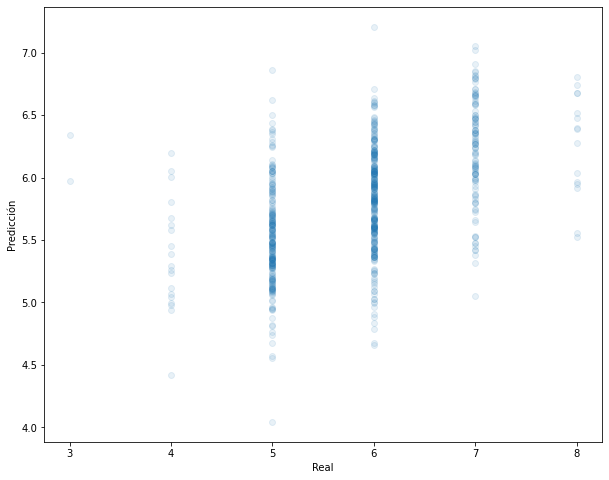

In [138]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.show()

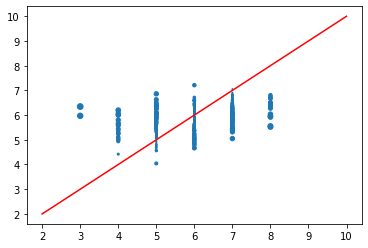

In [148]:
plt.scatter(y_test, y_pred,
            s=10*np.sqrt(np.power(y_pred - y_test, 2)))
plt.plot([2, 10], [2, 10], c='red')

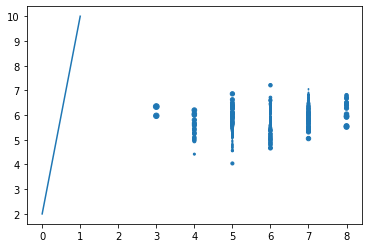

In [151]:
plt.scatter(y_test, y_pred,
            s=10*np.sqrt(np.power(y_pred - y_test, 2)))
plt.plot([2, 10])

In [153]:
[[y_test]]

[[5141    7
  6402    6
  6059    6
  2449    6
  4749    6
         ..
  3710    5
  1767    5
  567     5
  2302    5
  6241    6
  Name: quality, Length: 650, dtype: int64]]

In [146]:
#Metricas

print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2: {clf.score(x_test, y_test)}") #Esta entre 0 y 1. 

MAE: 0.558316897532024
MSE: 0.5259897128765507
RMSE: 0.7252514825055862
R2: 0.2563084465605071


test error 0.558316897532024


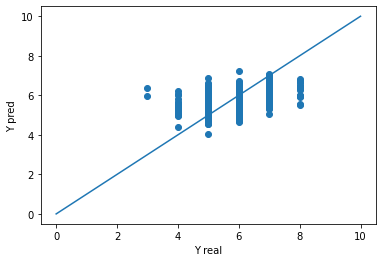

In [149]:
# calcular y_pred = clf.predict(x_test)

#print(mean_squared_error(y_train, y_pred_train))
# print('train error', mean_absolute_error(y_train, y_pred))

# ERROR EN EL CONJUNTO DE TEST
print('test error', mean_absolute_error(y_test, y_pred))

plt.xlabel('Y real')
plt.ylabel('Y pred')
plt.plot([0, 10], [0, 10])
plt.scatter(y_test, y_pred)

In [ ]:
plt.hist(y_test, bins=50, alpha=0.5)

In [ ]:
plt.hist(y_test, bins=50, alpha=0.5)

In [ ]:
print('RECALL SCORE:')
y_test

# Otro ejercicio

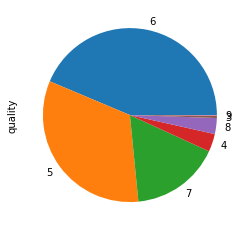

In [96]:
data['quality'].value_counts().plot.pie()

# Scalling

In [ ]:
d = data['quality']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Es necesario realizara esta operacion para que el vector tenga 2 dimensiones
d = d.values.reshape(-1,1)
scaler.fit(d)
print('Max:',scaler.data_max_)
print('Min:',scaler.data_min_)
dscaled = scaler.transform(d)
plt.hist(dscaled)

In [ ]:
d = data['quality']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Es necesario realizara esta operacion para que el vector tenga 2 dimensiones
d = d.values.reshape(-1,1)
scaler.fit(d)
print('Mean:',scaler.mean_)
print('Var:',scaler.var_)
dscaled = scaler.transform(d)
plt.hist(dscaled)

# Deberes

Transformar el array quality a valores 0 y 1 en funcion de si son menor o mayor que 0.5 tras realizar un MaxMinScaller

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('../Data/winequality.csv',sep=';')
d = data['quality']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Es necesario realizara esta operacion para que el vector tenga 2 dimensiones
d = d.values.reshape(-1,1)
scaler.fit(d)
print('Max:',scaler.data_max_)
print('Min:',scaler.data_min_)
dscaled = scaler.transform(d)
plt.hist(dscaled)

Max: [9.]
Min: [3.]


(array([  30.,  216.,    0., 2138.,    0., 2836., 1079.,    0.,  193.,
           5.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

In [1]:
# Redimensionamos a una dimension
d1 = dscaled.reshape(-1)

# Convertimos de numpy array a Pandas series para poder emplear los metodos de pandas
qualityNormalized = pd.Series(d1)

NameError: name 'dscaled' is not defined

In [91]:
data.drop("quality",axis=1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         8.8  
1         9.5  
2        10.1  
3         9.9  
4         9.9  
...       ...  
6492     10.5  
6493     11.2  
6494     11.0  
6495     10.2  
6496     11.0  

[6497 rows x 11 columns]